# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

# Data Preprocessing and EDA

> Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

> Reading the dataset

In [31]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

> Let's check shape of dataset

In [32]:
df.shape

(50000, 14)

we have:

- rows = 50,000
- columns = 14

> Taking the information of the dataset

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

> Let's check for any duplicate values.

In [34]:
df[df.duplicated()]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0


So we have 719 duplicate rows, nearly 1.4 % of data.

> Let's drop duplicates

In [35]:
df_copy = df.copy()

In [36]:
df_copy.drop_duplicates(inplace=True)
df_copy.reset_index(drop=True, inplace=True)

In [37]:
df_copy.duplicated().sum()

np.int64(0)

In [38]:
df_copy.shape

(49281, 14)

> Let's map the flight day.

In [39]:
df_copy["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [40]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df_copy["flight_day"] = df_copy["flight_day"].map(mapping)

In [41]:
df_copy["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

> Let's check for value counts of the data.

In [42]:
df_copy.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [43]:
val_count_list = ['sales_channel','trip_type','flight_day','route','booking_origin']

for col in val_count_list:
    print(f"Value counts for {col}")
    print(df_copy[col].value_counts())
    print("\n")

Value counts for sales_channel
sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64


Value counts for trip_type
trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64


Value counts for flight_day
flight_day
1    7988
3    7562
2    7558
4    7323
5    6685
7    6442
6    5723
Name: count, dtype: int64


Value counts for route
route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
CKGKNO       1
KBRWUH       1
JEDMFM       1
KTMTWU       1
MRUXIY       1
Name: count, Length: 799, dtype: int64


Value counts for booking_origin
booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Ghana                       1
Gibraltar                   1
Guatemala                   1
Algeria                     1
Svalbard & Jan Mayen        1
Name: count, Leng

- Sale chenal have two main source, Mobile and Internet, out of which Internet have maximum booking.
- Trip type have three particulars, round trip, one way and circle trip. Amoung which Round trip accounts maximum.
- Most flights are boarded on Monday, followed by wednesday and tuesday. Saturday holds least flight in the week.
- Passengers mostly prefer AKLKUL route.
- Most flights are booked from Australia followed by Malaysia and South Korea.

> Let's check basic statistical data.

In [44]:
df_copy.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,3.813620,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,1.991913,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.


> Let's define numerical and categorical columns

In [45]:
Numerical_col =[feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
Categorical_col =[feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

print (f" We have {len(Numerical_col)} Numerical columns and they are: \n{Numerical_col}\n")
print (f" We have {len(Categorical_col)} Categorical columns and they are: \n{Categorical_col}")

 We have 10 Numerical columns and they are: 
['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']

 We have 4 Categorical columns and they are: 
['sales_channel', 'trip_type', 'route', 'booking_origin']


> Let's check booking completion data

In [46]:
print(f"Booking complete in numbers:\n{df_copy['booking_complete'].value_counts()}\n")
print(f"Booking complete in percent:\n{df_copy['booking_complete'].value_counts(normalize=True)*100}\n")

Booking complete in numbers:
booking_complete
0    41890
1     7391
Name: count, dtype: int64

Booking complete in percent:
booking_complete
0    85.002334
1    14.997666
Name: proportion, dtype: float64



- Nearly 85 % of people didn't complete their booking.

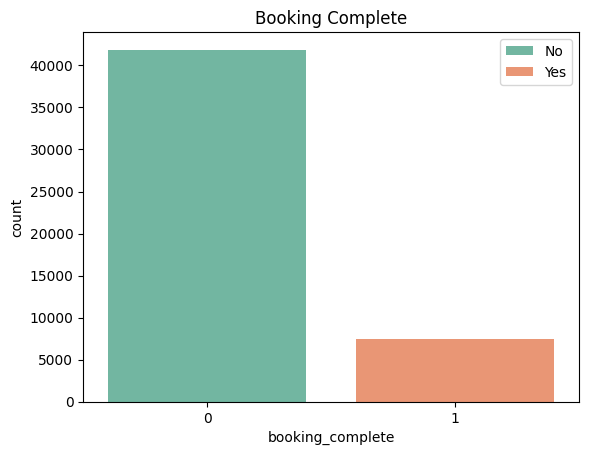

<Figure size 640x480 with 0 Axes>

In [47]:
sns.countplot(x='booking_complete',data=df_copy,palette='Set2')
plt.title('Booking Complete')
plt.legend(['No','Yes'])
plt.show()
plt.savefig('images/01_Booking_Complete_count.png', dpi=300, bbox_inches='tight')

> Let's check the skewness in numerical columns

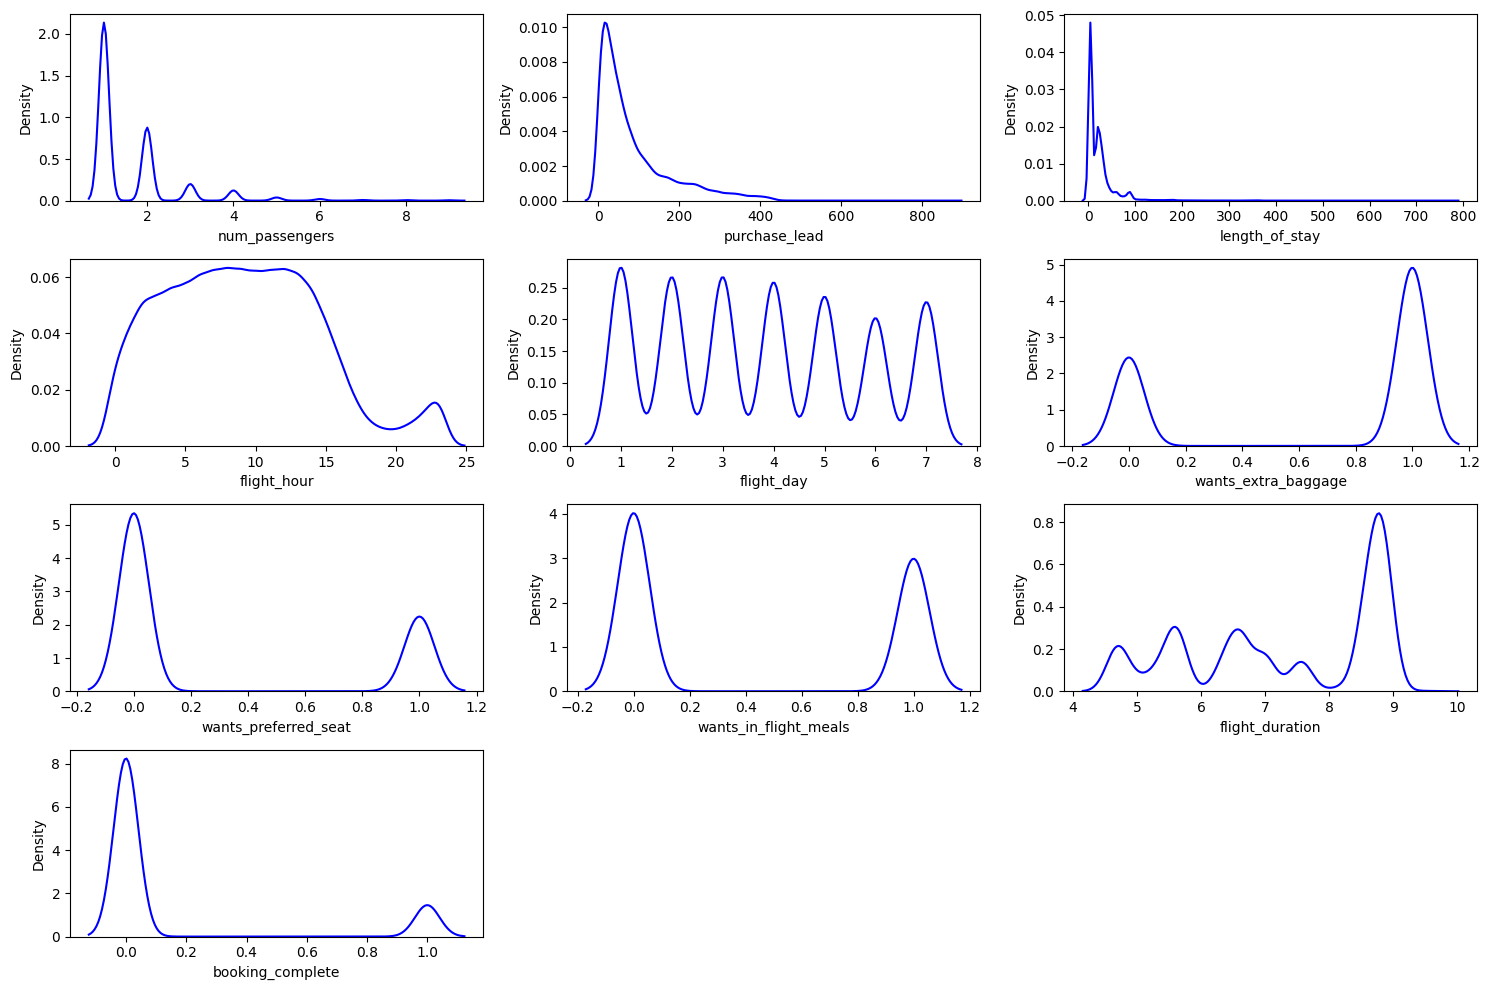

In [48]:
plt.figure(figsize=(15,10))
for i in range (0,len(Numerical_col)):
  plt.subplot(4,3,i+1)
  sns.kdeplot(x=df_copy[Numerical_col[i]],color='blue')
  plt.xlabel(Numerical_col[i])
  plt.tight_layout()
  plt.savefig('images/02_KDE_Numerical_Col.png', dpi=300, bbox_inches='tight')

- num_passengers: The distribution shows a high density around 1 and 2 passengers, with fewer bookings for larger groups.


- purchase_lead: Most bookings have a short lead time, with density rapidly decreasing as the number of days before arrival increases.

- length_of_stay: The majority of stays are short, with the highest density near 0-10 days.

- flight_hour: Bookings are distributed across the day, with peaks in the morning/early afternoon and again in the evening.

- flight_day: The data exhibits a cyclical pattern, indicating relatively uniform booking density across the days of the week.

- wants_extra_baggage: This shows people who wants extra baggage (1) are twice more than who don't (0).

- wants_preferred_seat: Passengers who want preferred seat are half the number who don't want.

- wants_in_flight_meals: Those who want meals (1) and those who do not (0), are nearly same.

- flight_duration: Flight durations show a multimodal distribution, with distinct peaks around 4.5, 6, 7, and 9 hours.

- booking_complete: The vast majority of instances show incomplete booking (0), while a smaller, separate group indicates otherwise (1).

> Let's check for Categorical columns

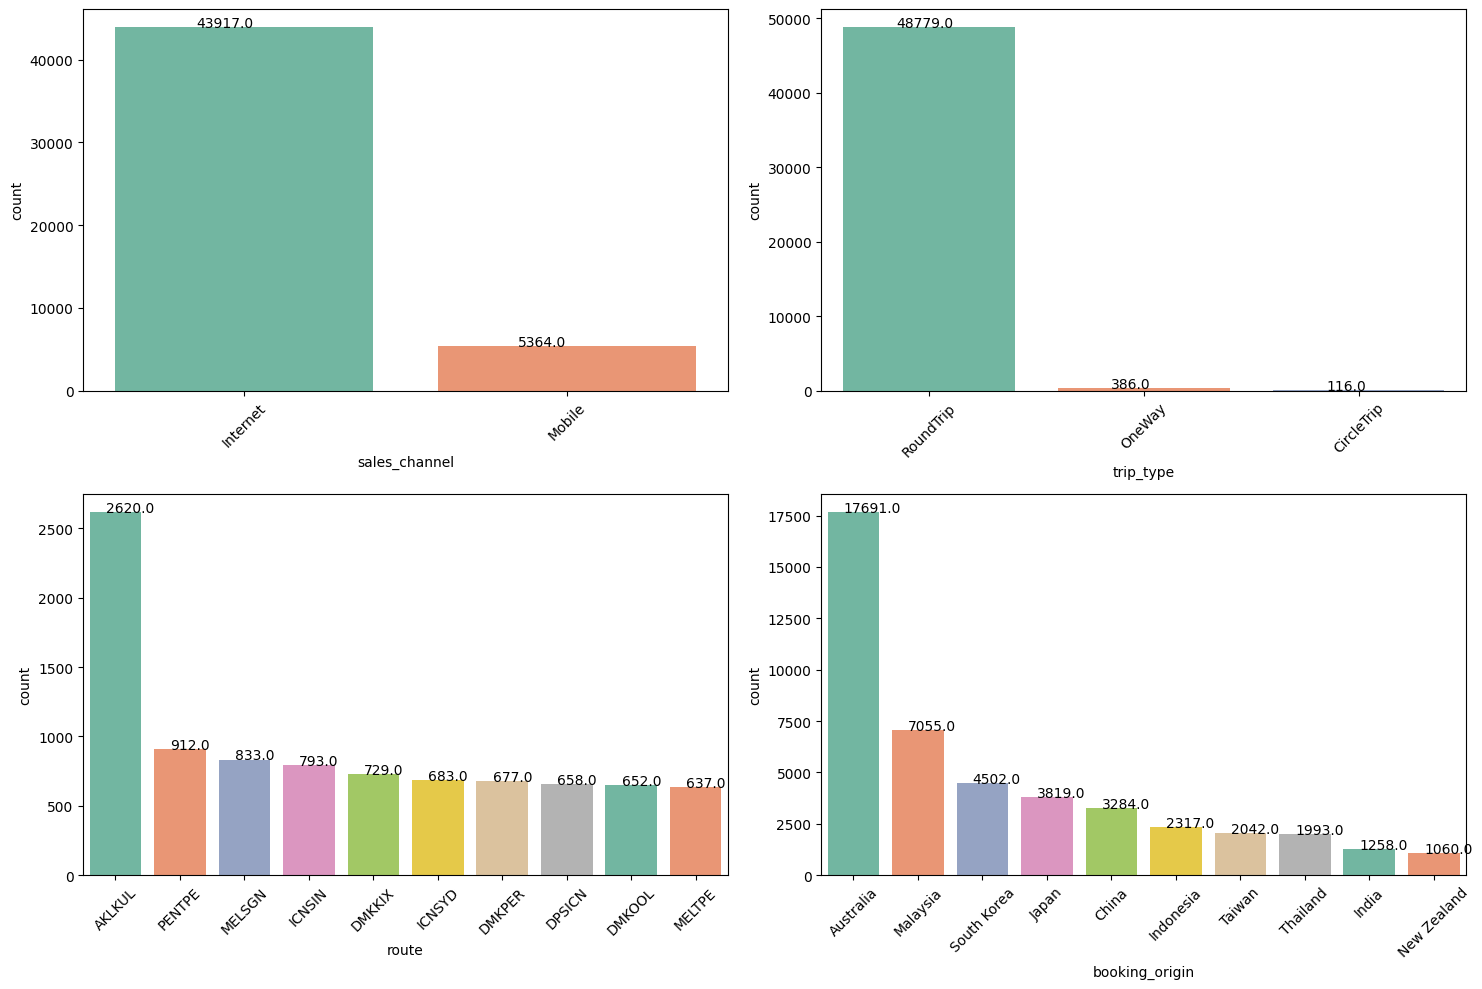

In [49]:
plt.figure(figsize=(15,10))

for i in range (0, len (Categorical_col)):
    plt.subplot(2,2,i+1)

    # Filter the data to include only the top 10 values
    top_10_values = df_copy[Categorical_col[i]].value_counts().head(10).index
    filtered_df = df_copy[df_copy[Categorical_col[i]].isin(top_10_values)]

    ax = sns.countplot(x=filtered_df[Categorical_col[i]], palette='Set2', order=top_10_values)

    for j in ax.patches:
        ax.annotate(j.get_height(), (j.get_x()+0.25,j.get_height()+0.5))
    plt.xlabel(Categorical_col[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('images/03_CountPlot_Cat_col.png', dpi=300, bbox_inches='tight')

- Sales Channels: "Internet" is the dominant channel with 43,917 counts, while "Mobile" has 5,364.

- Trip Types: "Round Trip" is overwhelmingly common with 48,779 counts.
- Route : The AKLKUL route has the highest count with 2620.
- Booking origin:  Australia has the highest count among booking origins with 17691.

> Checking multicolinearity with numerical columns

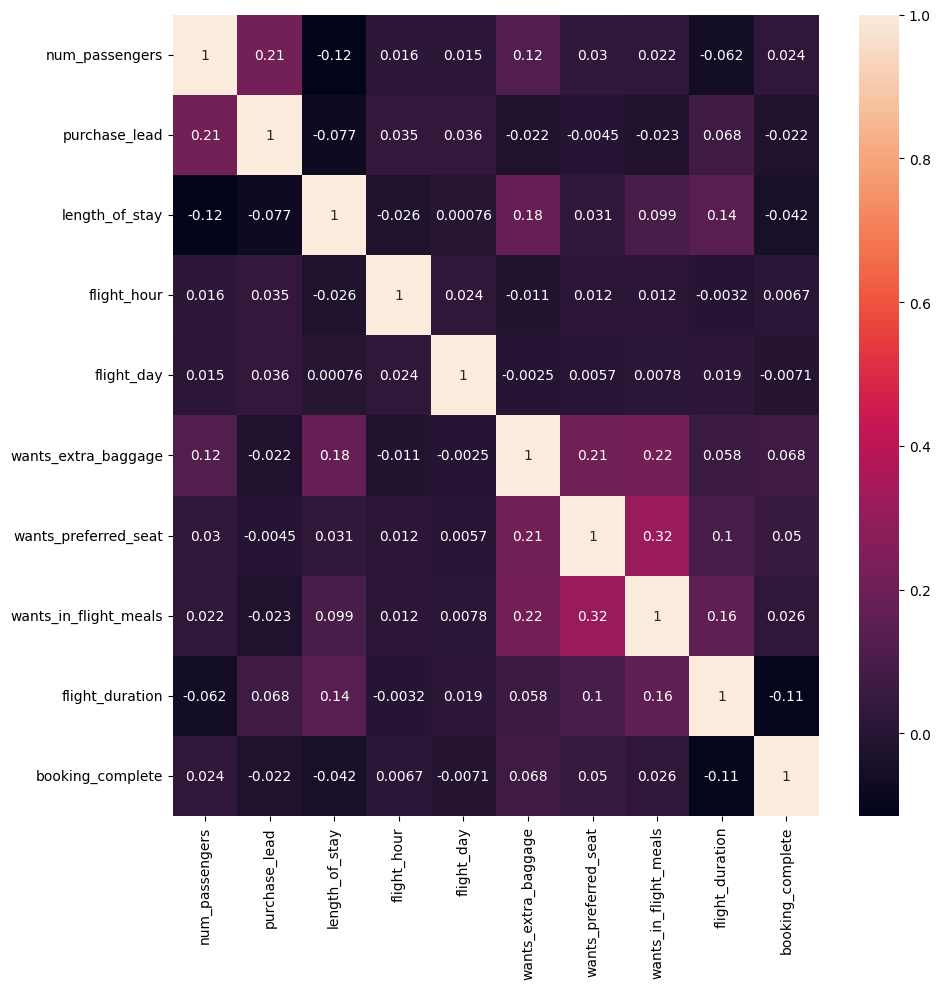

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure(figsize=(10,10))

sns.heatmap(df_copy[Numerical_col].corr(),annot=True)
plt.tight_layout()
plt.show()
plt.savefig('images/04_Heatmap.png', dpi=300, bbox_inches='tight')

- length_of_stay and wants_extra_baggage: There is a positive correlation of 0.18, suggesting that people staying longer are slightly more likely to want extra baggage.

- wants_preferred_seat and wants_in_flight_meals: A moderate positive correlation of 0.32 is observed, indicating a tendency for passengers who want one to also want the other.

- flight_duration and booking_complete: There is a negative correlation of -0.11, suggesting that longer flights are slightly less likely to have completed bookings in this dataset.

- purchase_lead and length_of_stay: These two variables show a negative correlation of -0.077, implying that booking further in advance is slightly associated with shorter stays.

> Booking vs Additional Columns

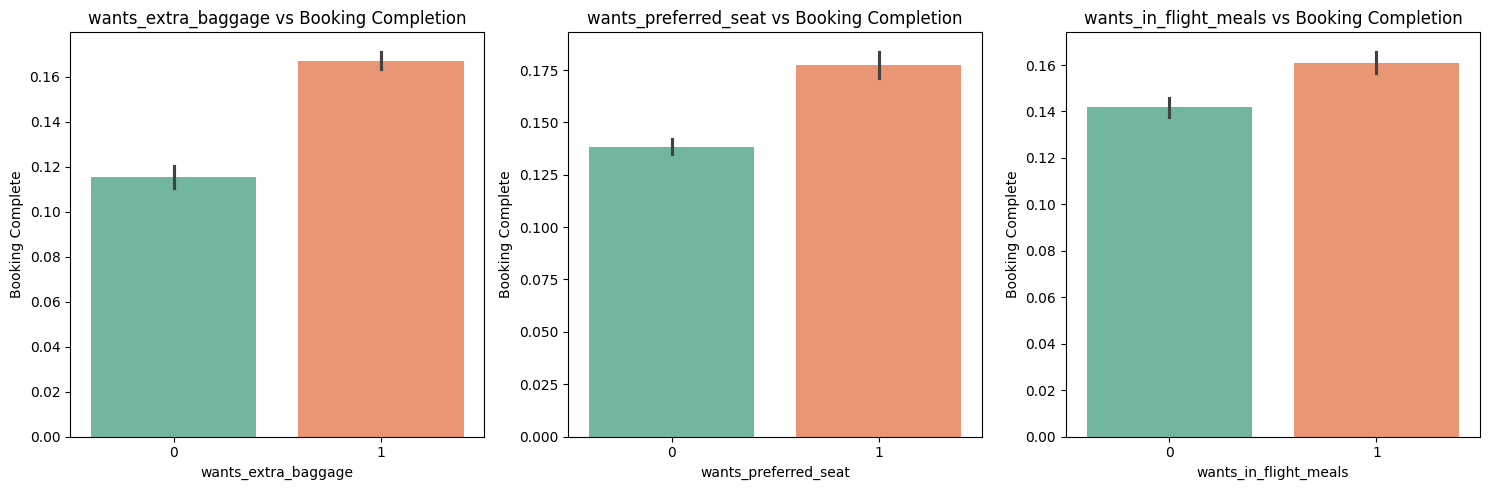

<Figure size 640x480 with 0 Axes>

In [51]:
addon_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
plt.figure(figsize=(15,5))
for i in range(0,len(addon_cols)):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=df_copy[addon_cols[i]], y=df_copy['booking_complete'],palette='Set2')
    plt.title(f'{addon_cols[i]} vs Booking Completion')
    plt.ylabel('Booking Complete')
plt.tight_layout()
plt.show()
plt.savefig('images/05_Booking_vs_Add_col.png', dpi=300, bbox_inches='tight')

- Passengers wanting extra baggage are significantly more likely to complete their booking.
- Passengers wanting a preferred seat are significantly more likely to complete their booking.
- Passengers wanting in-flight meals are significantly more likely to complete their booking.

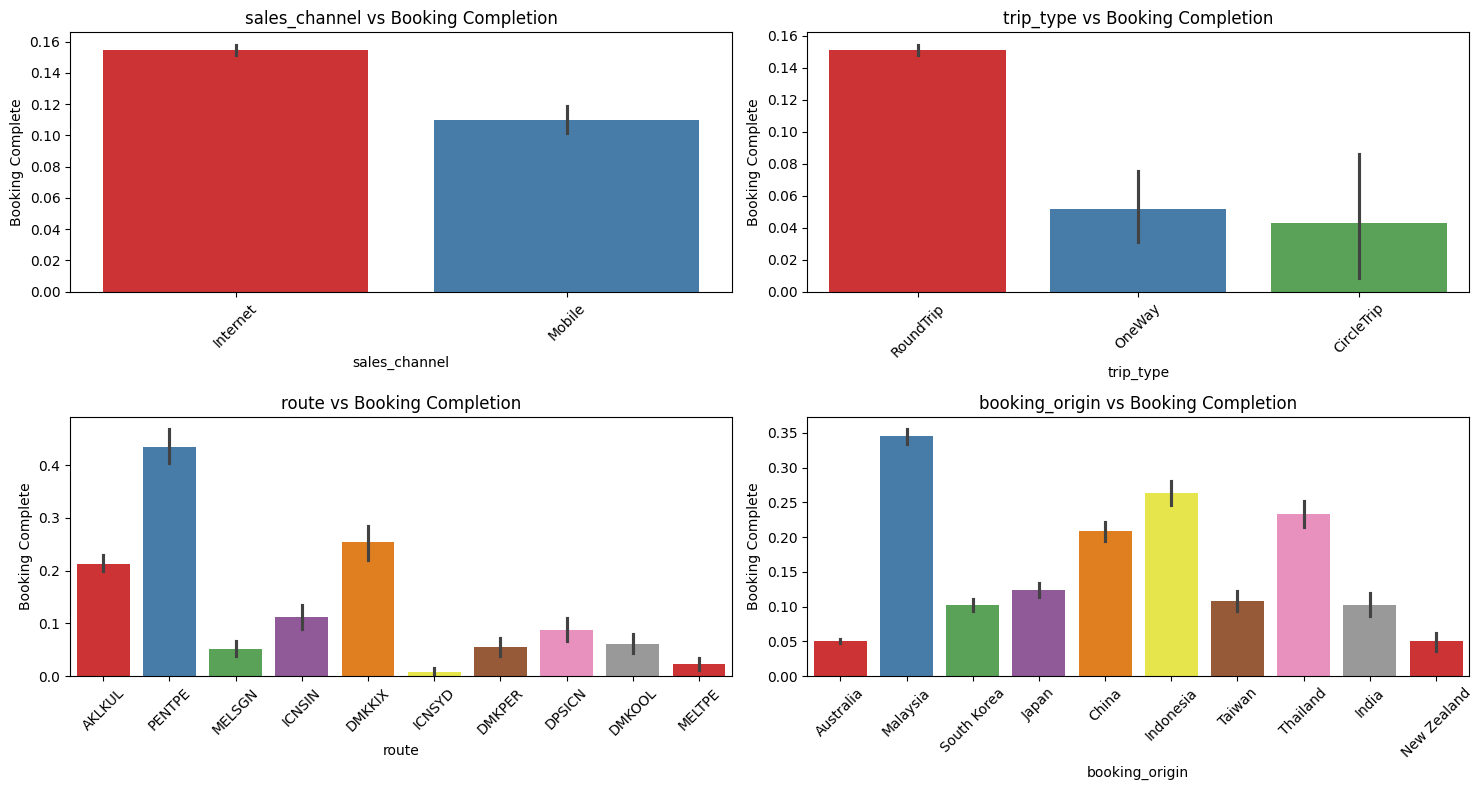

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(15,8))

for i in range(0,len(Categorical_col)):
    plt.subplot(2, 2, i+1)
    # Filter the data to include only the top 10 values
    top_10_values = df_copy[Categorical_col[i]].value_counts().head(10).index
    filtered_df = df_copy[df_copy[Categorical_col[i]].isin(top_10_values)]
    sns.barplot(x=df_copy[Categorical_col[i]], y=df_copy['booking_complete'],palette='Set1',order=top_10_values)
    plt.title(f'{Categorical_col[i]} vs Booking Completion')
    plt.ylabel('Booking Complete')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('images/06_Booking_vs_Cat_col.png', dpi=300, bbox_inches='tight')

- Sales Channel: Internet bookings have a higher completion rate than mobile bookings.
- Trip Type: Round trip bookings have a significantly higher completion rate compared to one-way or circle trip bookings.
- Route: The PENTPE route shows the highest booking completion rate among the displayed routes.
- Booking Origin: Bookings originating from Malaysia have the highest completion rate, while those from Australia have the lowest.

In [53]:
#Let's save the preprocessed file

df_copy.to_csv('data/preprocessed_data.csv', index=False)